# Jupiter notebook for the first seminar

In [8]:
import math
import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])

print(a)
print(b)

[1 2 3 4 5]
[5 4 3 2 1]


Task 1: compute half-products of a and b elements 

In [9]:
print("a*b/2: ", a*b/2)

a*b/2:  [2.5 4.  4.5 4.  2.5]


Task 2: elementwise quotient between squared a and (b plus 1)

In [10]:
print("a**2/(b+1): ", a**2/(b+1))

a**2/(b+1):  [ 0.16666667  0.8         2.25        5.33333333 12.5       ]


Task 3: (7 x 5) matrix with e_ij = i

In [11]:
e = np.arange(7)
print(e[:,None] + np.zeros(shape=(7,5), dtype=int))

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]]


In [12]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2021/raw/main/seminar01/train.csv

--2021-09-30 17:17:41--  https://github.com/HSE-LAMBDA/MLatFIAN2021/raw/main/seminar01/train.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2021/main/seminar01/train.csv [following]
--2021-09-30 17:17:41--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2021/main/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.5’

train.csv.5         100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2021-09-30 17:17:41 (1.30 MB/s) - ‘train.csv.5’ saved [60302/60302]



Task 4: select passengers number 13 and 666 - did they survive?

In [13]:
import pandas as pd

data = pd.read_csv("train.csv", index_col='PassengerId')
numbersOfPassengers = [13,666]
unluckyPassengers = data["Survived"].loc[numbersOfPassengers]
for i in numbersOfPassengers:
    if (unluckyPassengers.loc[i]):
        print("Passenger "+str(i)+" survived")
    else:
        print("Passenger "+str(i)+" did not survive")

Passenger 13 did not survive
Passenger 666 did not survive


In [14]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())

Task 5: compute the overall survival rate

In [15]:
infoAboutSurvivals = data["Survived"]
print("Survival rate is ", infoAboutSurvivals.mean())

Survival rate is  0.3838383838383838


Task 6: compute mean passenger age and find the oldest guy on the ship

In [16]:
ageOfPassengers = data["Age"]
print("Mean passenger age = ", ageOfPassengers.mean())
print("The oldest guy on the ship:")
print(data.loc[ageOfPassengers.idxmax()])

Mean passenger age =  29.699117647058763
The oldest guy on the ship:
Survived                                       1
Pclass                                         1
Name        Barkworth, Mr. Algernon Henry Wilson
Sex                                         male
Age                                         80.0
SibSp                                          0
Parch                                          0
Ticket                                     27042
Fare                                        30.0
Cabin                                        A23
Embarked                                       S
Name: 631, dtype: object


Task 7: who on average paid more for their ticket, men or women?

In [17]:
menData = data.loc[(data["Sex"]=="male")]
womenData = data.loc[(data["Sex"]=="female")]
meanFareMen = menData["Fare"].mean()
meanFareWomen = womenData["Fare"].mean()
print("Men on average paid ", meanFareMen)
print("Women on average paid ", meanFareWomen)

Men on average paid  25.523893414211418
Women on average paid  44.47981783439487


Task 8: who is more likely to survive: a child (<18 yo) or an adult?

In [18]:
childrenData = data.loc[(data["Age"]<18)]
adultData = data.loc[(data["Age"]>=18)]
print("Survivability of children: ", childrenData["Survived"].mean())
print("Survivability of adults: ", adultData["Survived"].mean())

Survivability of children:  0.5398230088495575
Survivability of adults:  0.36118251928020567


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Task 9: plot a histogram of age and a histogram of ticket fares on separate plots

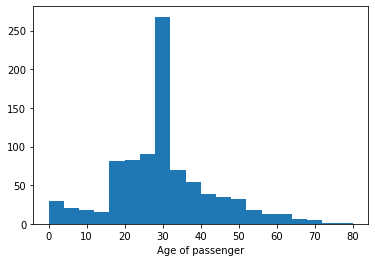

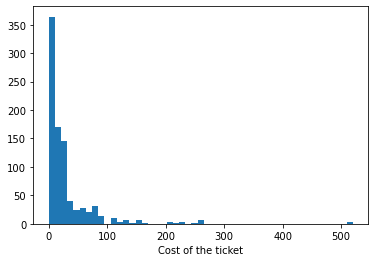

In [20]:
binsForAge = np.linspace(0,80,21)
plt.xlabel("Age of passenger")
plt.hist(data["Age"],bins=binsForAge)
plt.show()
binsForFare = np.linspace(0,520,50)
plt.xlabel("Cost of the ticket")
plt.hist(data["Fare"],bins=binsForFare)
plt.show()

Task 10: draw a 2D histogram of age vs fare

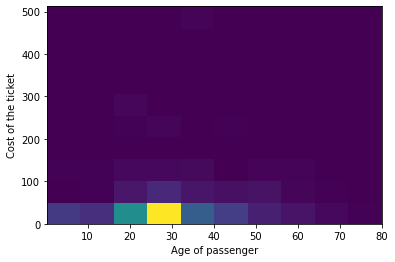

In [21]:
plt.xlabel("Age of passenger")
plt.ylabel("Cost of the ticket")
plt.hist2d(data["Age"],data["Fare"])
plt.show()

Task 11: make a scatter plot of passenger age vs ticket fare

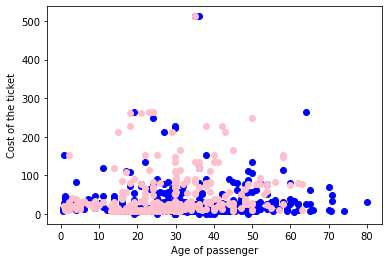

In [22]:
plt.xlabel("Age of passenger")
plt.ylabel("Cost of the ticket")
plt.scatter(menData["Age"], menData["Fare"], c="blue")
plt.scatter(womenData["Age"], womenData["Fare"], c="pink")
plt.show()

Task 12: tune n_neighbors and add more features to achieve accuracy of at least 0.75

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

artificialData = data.copy()
artificialData.loc[(artificialData["Sex"]=="male"),"Sex"]=1
artificialData.loc[(artificialData["Sex"]=="female"),"Sex"]=0

features = artificialData[["Fare","Age","SibSp","Sex"]]
answers = artificialData["Survived"]

accuracy = 0
neededI = 0
for i in range(1,101):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(features[:-100], answers[:-100])
    test_predictions = model.predict(features[-100:])
    tempAccuracy = accuracy_score(answers[-100:], test_predictions)
    if (tempAccuracy > accuracy):
        neededI = i
        accuracy = tempAccuracy

print("Test accuracy: ", accuracy, ", is achieved at ", neededI, " neighbors",sep="")

Test accuracy: 0.78, is achieved at 3 neighbors
